## Parte 1
Podemos pasar a la esfera de Bloch utilizando las matrices de Gell-Mann en el caso de un qutrit (sistema cuántico de tres niveles). Para el espacio $\mathcal{H}_3$ existen ocho maatrices de Gell-Mann, por lo que la representación de este sistema en la esfera de Bloch será un vector con ocho entradas.

In [3]:
lambda_1=[0. 1. 0.; 1. 0. 0.; 0. 0. 0];
lambda_2=[0. -im 0.; im 0. 0.; 0. 0. 0];
lambda_3=[1. 0. 0.; 0. -1. 0.; 0. 0. 0];
lambda_4=[0. 0. 1.; 0. 0. 0.; 1. 0. 0];
lambda_5=[0. 0. -im; 0. 0. 0.; im 0. 0];
lambda_6=[0. 0. 0.; 0. 0. 1.; 0. 1. 0];
lambda_7=[0. 0. 0.; 0. 0. im; 0. -im 0];
lambda_8=(1/(3)^(1/2))*[1. 0. 0.; 0. 1. 0.; 0. 0. -2];
lambdas=Array[lambda_1, lambda_2, lambda_3, lambda_4, lambda_5, lambda_6, lambda_7, lambda_8];


function projector(state)
    return state*state'
end

function random_state(dim=3) 
    v=randn(1,dim)+randn(1,dim)im
    v=v/norm(v)
    return v'
end

psi=random_state()

"""
Function that takes a pure 3-level state and returns the Bloch sphere representation 
"""

function stateToBloch(psi::Array)
    lista = Float64[]
    for lambda in lambdas
        push!(lista, real(trace(lambda*projector(psi))))
    end
    lista
end

stateToBloch

In [36]:
ψ=random_state();
stateToBloch(ψ)

8-element Array{Float64,1}:
 -0.738492 
 -0.0811442
 -0.592428 
 -0.172066 
 -0.0775401
  0.372729 
 -0.12102  
  0.491137 

En el caso de tener dos qubits (que puede ser visto como tener un sistema cuántico de cuatro niveles), podemos encontrar las matrices de $4\times 4$ haciendo el producto tensorial entre las matrices de Pauli y la matriz identidad de $2\times 2$

In [7]:
sigma_0=[1. 0.;0. 1.]
sigma_x=[0. 1.; 1. 0.];
sigma_y=[0. -im; im 0];
sigma_z=[1. 0.;0. -1.];
sigmas=Array[kron(sigma_0,sigma_x), kron(sigma_0,sigma_y), kron(sigma_0,sigma_z),kron(sigma_x,sigma_0),kron(sigma_x,sigma_x),kron(sigma_x,sigma_y),kron(sigma_x,sigma_z),kron(sigma_y,sigma_0),kron(sigma_y,sigma_x),kron(sigma_y,sigma_y),kron(sigma_y,sigma_z),kron(sigma_z,sigma_0),kron(sigma_z,sigma_x),kron(sigma_z,sigma_y),kron(sigma_z,sigma_z)];


function projector(state)
    return state*state'
end

function random_state(dim=4) 
    v=randn(1,dim)+randn(1,dim)im
    v=v/norm(v)
    return v'
end

psi=random_state()

"""
Function that takes a pure 4-level state and returns the Bloch sphere representation 
"""

function stateToBloch(psi::Array)
    lista = Float64[]
    for sigma in sigmas
        push!(lista, real(trace(sigma*projector(psi))))
    end
    lista
end

stateToBloch

In [8]:
ψ=random_state();
stateToBloch(ψ)

15-element Array{Float64,1}:
 -0.0101213 
  0.705657  
  0.673499  
  0.223852  
  0.0530808 
  0.309112  
  0.00929806
  0.930835  
 -0.0646131 
  0.664587  
  0.684797  
 -0.187328  
 -0.203604  
 -0.0952388 
 -0.181415  

## Parte 2
Se hace la gráfica, pero hasta ahora el comportamiento es caótico y no funciona nada

In [28]:
using PyPlot

function random_matrix(n::Int)
    v=randn(n,n)+randn(n,n)im
end

function hermiteanmatrix(n)
    M=random_matrix(n)
    M+=M'
end

"""
Función que calcula la diferencia del valor esperado de una matriz aleatoria hermiteana y su traza
"""
function SVcomp(n)
    H=hermiteanmatrix(n)
    v=random_state(n)
    @show SV=(v'*H*v)[1]
    @show SV2= trace(H)/n
    return norm(SV-SV2)
end

function dataSVgraph(dimmax::Int)
    temp=zeros(Float64,dimmax)
    x=collect(1:dimmax)
    for i in 1:dimmax
        temp[i]=SVcomp(i)
    end
    plot(x,temp)
    grid("on")
    xlabel("n")
    ylabel("|tr(H)/n - <H>|")
end

dataSVgraph (generic function with 1 method)

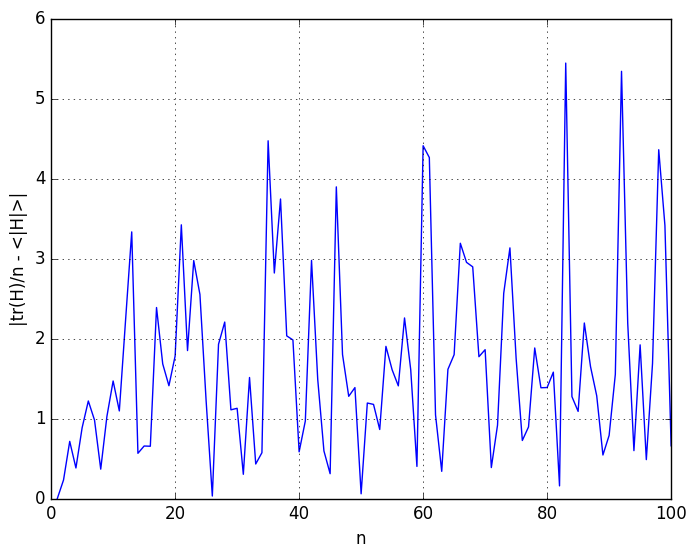

PyObject <matplotlib.text.Text object at 0x7faf25d82610>

In [9]:
dataSVgraph(100)

In [24]:
SVcomp(500)

SV = (v' * H * v)[1] = -0.5226968757188407 - 1.6653345369377348e-15im
SV2 = trace(H) / n = 0.0646967424195169 + 0.0im


0.5873936181383577